In [42]:
%pip install numpy pandas matplotlib scikit-learn pytest


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Создание датасетов

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Чистые данные
def create_dataset(seed=0, noise=1.0, outliers=False):
    np.random.seed(seed)
    xs = np.linspace(0, 10, 100)
    ys = xs + (np.random.random(100) * 2 - 1) * noise
    if outliers:
        ys[25:45] *= 2  # добавляем выбросы
    return pd.DataFrame({'x': xs, 'y': ys})

# Dataset 1 (чистый)
df1 = create_dataset(seed=1, noise=0.5)
df1.to_csv("clean1.csv", index=False)

# Dataset 2 (чистый)
df2 = create_dataset(seed=2, noise=0.4)
df2.to_csv("clean2.csv", index=False)

# Dataset 3 (чистый)
df3 = create_dataset(seed=3, noise=0.6)
df3.to_csv("clean3.csv", index=False)

# Dataset 4 (с шумом)
df_noisy = create_dataset(seed=4, noise=0.6, outliers=True)
df_noisy.to_csv("noisy.csv", index=False)


## Обучение модели

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

df = pd.read_csv("clean1.csv")
X = df[['x']]
y = df['y']

model = LinearRegression()
model.fit(X, y)

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


## Создание тестов

In [45]:
%%writefile test_model.py
import pytest
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error

@pytest.fixture(scope="module")
def model():
    with open("model.pkl", "rb") as f:
        return pickle.load(f)

def test_clean1(model):
    df = pd.read_csv("clean1.csv")
    preds = model.predict(df[['x']])
    mse = mean_squared_error(df['y'], preds)
    assert mse < 1.0

def test_clean2(model):
    df = pd.read_csv("clean2.csv")
    preds = model.predict(df[['x']])
    mse = mean_squared_error(df['y'], preds)
    assert mse < 1.0

def test_clean3(model):
    df = pd.read_csv("clean3.csv")
    preds = model.predict(df[['x']])
    mse = mean_squared_error(df['y'], preds)
    assert mse < 1.0

def test_noisy(model):
    df = pd.read_csv("noisy.csv")
    preds = model.predict(df[['x']])
    mse = mean_squared_error(df['y'], preds)
    assert mse < 1.0


Overwriting test_model.py


## Построение графиков

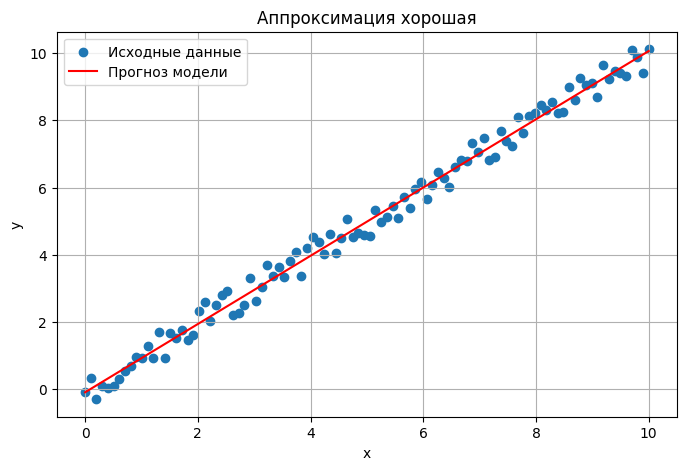

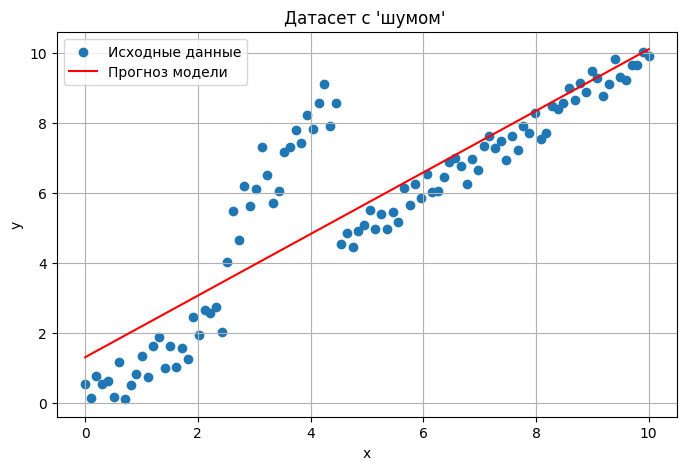

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plot_data_with_predictions(file_path, title):
    df = pd.read_csv(file_path)
    X = df[['x']]
    y = df['y']

    model = LinearRegression()
    model.fit(X, y)
    preds = model.predict(X)

    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, label="Исходные данные")
    plt.plot(X, preds, color='red', label="Прогноз модели")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# 📈 обычные
plot_data_with_predictions("clean1.csv", "Аппроксимация хорошая")

# 📉 шум
plot_data_with_predictions("noisy.csv", "Датасет с 'шумом' ")

## Запуск тестов

In [47]:
!pytest test_model.py -v


============================= test session starts =============================
platform win32 -- Python 3.13.3, pytest-8.3.5, pluggy-1.6.0 -- C:\Users\klimo\Desktop\Ycheba\Automat ML\lab5\.venv\Scripts\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\klimo\Desktop\Ycheba\Automat ML\lab5
plugins: anyio-4.9.0
collecting ... collected 4 items

test_model.py::test_clean1 PASSED                                        [ 25%]
test_model.py::test_clean2 PASSED                                        [ 50%]
test_model.py::test_clean3 PASSED                                        [ 75%]
test_model.py::test_noisy FAILED                                         [100%]

================================== FAILURES ===================================
_________________________________ test_noisy __________________________________

model = LinearRegression()

    def test_noisy(model):
        df = pd.read_csv("noisy.csv")
        preds = model.predict(df[['x']])
        mse = mean_squared_error(df[